|  Column name  |  Description  |
| ----- | ------- |
| Num_posts        | Number of total posts that the user has ever posted   |
| Num_following    | Number of following                                   |
| Num_followers    | Number of followers                                   |
| Biography_length | Length (number of characters) of the user's biography |
| Picture_availability | Value 0 if the user has no profile picture, or 1 if has |
| Link_availability| Value 0 if the user has no external URL, or 1 if has |
| Average_caption_length | The average number of character of captions in media |
| Caption_zero     | Percentage (0.0 to 1.0) of captions that has almost zero (<=3) length |
| Non_image_percentage | Percentage (0.0 to 1.0) of non-image media. There are three types of media on an Instagram post, i.e. image, video, carousel
| Engagement_rate_like | Engagement rate (ER) is commonly defined as (num likes) divide by (num media) divide by (num followers)
| Engagement_rate_comment | Similar to ER like, but it is for comments |
| Location_tag_percentage | Percentage (0.0 to 1.0) of posts tagged with location |
| Average_hashtag_count   | Average number of hashtags used in a post |
| Promotional_keywords | Average use of promotional keywords in hashtag, i.e. regrann, contest, repost, giveaway, mention, share, give away, quiz |
| Followers_keywords | Average use of followers hunter keywords in hashtag, i.e. follow, like, folback, follback, f4f|
| Cosine_similarity  | Average cosine similarity of between all pair of two posts a user has |
| Post_interval      | Average interval between posts (in hours) |
| real_fake          | r (real/authentic user), f (fake user/bought followers) |

# Q1: Import labraries

In [55]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix

# Q2: Read instagram_users.csv file

In [56]:
df = pd.read_csv('instagram_users.csv')

# Q3: Split tha dataset into training and testing

In [57]:
x = df.loc[:, df.columns!='real_fake']
y = df['real_fake'] 

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=23)

# Q4: Build three machine models 

## Q4.1: The first machine model
- Print the model's name.
- Print the model's accuracy.
- Print the model's confusion matrix.

## Building and Train the Model

In [59]:
dt = tree.DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [60]:
x_pred = dt.predict(x_test)
x_pred

array(['real', 'real', 'fake', ..., 'fake', 'real', 'fake'], dtype=object)

In [61]:
accuracy = accuracy_score(x_pred, y_test)
accuracy

0.8499014216042337

In [62]:
confMat = confusion_matrix(y_test,x_pred)
print(confMat)

[[8212 1390]
 [1503 8169]]


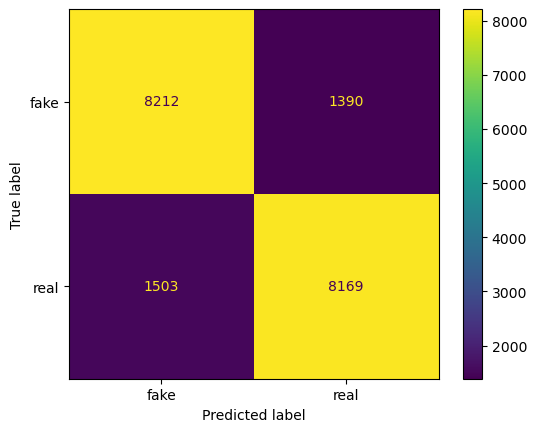

In [63]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dt, x_test, y_test)  
plt.show()

## Q4.2: The second machine model
- Print the model's name.
- Print the model's accuracy.
- Print the model's confusion matrix.

In [71]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train) 

RandomForestClassifier()

In [72]:
rf.predict

<bound method ForestClassifier.predict of RandomForestClassifier()>

In [73]:
x_predict = rf.predict(x_test)
x_predict

array(['real', 'real', 'fake', ..., 'fake', 'real', 'fake'], dtype=object)

In [74]:
accu = accuracy_score(x_predict, y_test)
accu

0.896700217910138

In [75]:
ConfusionMatrix = confusion_matrix(y_test, x_predict)
ConfusionMatrix

array([[8051, 1551],
       [ 440, 9232]], dtype=int64)

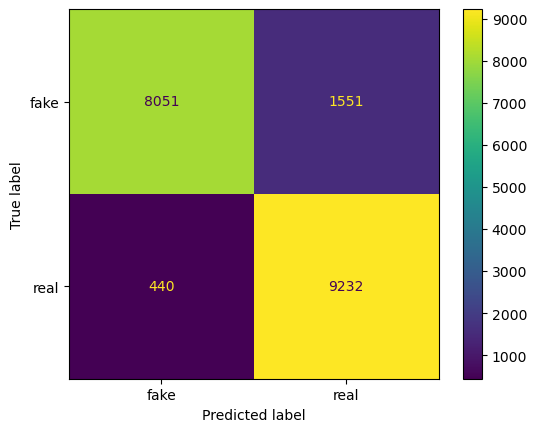

In [76]:
plot_confusion_matrix(rf, x_test, y_test)  
plt.show()

## Q4.3: The third machine model
- Print the model's name.
- Print the model's accuracy.
- Print the model's confusion matrix.

In [50]:
# write your code here ^_^